In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns 
import warnings
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.cluster import KMeans
import prince
import shap
from catboost import Pool, CatBoostClassifier
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, RobustScaler, StandardScaler
import matplotlib.pyplot as plt
import plotnine as p9




pd.options.display.max_rows = None
pd.options.display.max_columns = None

warnings.filterwarnings("ignore")

Fontconfig warning: ignoring UTF-8: not a valid region tag
/usr/local/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
#Read Dataset
df = pd.read_csv('home_insurance.csv')

Dataset Description 

In [3]:
#Shape
df.shape

(256136, 66)

In [4]:
#Data Types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256136 entries, 0 to 256135
Data columns (total 66 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   QUOTE_DATE              129524 non-null  object 
 1   COVER_START             189021 non-null  object 
 2   CLAIM3YEARS             190039 non-null  object 
 3   P1_EMP_STATUS           189021 non-null  object 
 4   P1_PT_EMP_STATUS        1782 non-null    object 
 5   BUS_USE                 189021 non-null  object 
 6   CLERICAL                2944 non-null    object 
 7   AD_BUILDINGS            189021 non-null  object 
 8   RISK_RATED_AREA_B       140876 non-null  float64
 9   SUM_INSURED_BUILDINGS   189021 non-null  float64
 10  NCD_GRANTED_YEARS_B     189021 non-null  float64
 11  AD_CONTENTS             189021 non-null  object 
 12  RISK_RATED_AREA_C       180290 non-null  float64
 13  SUM_INSURED_CONTENTS    189021 non-null  float64
 14  NCD_GRANTED_YEARS_C 

In [5]:
#Basic Statistics
df.describe(include=object)

,QUOTE_DATE,COVER_START,CLAIM3YEARS,P1_EMP_STATUS,P1_PT_EMP_STATUS,BUS_USE,CLERICAL,AD_BUILDINGS,AD_CONTENTS,CONTENTS_COVER,BUILDINGS_COVER,P1_DOB,P1_MAR_STATUS,P1_POLICY_REFUSED,P1_SEX,APPR_ALARM,APPR_LOCKS,FLOODING,NEIGH_WATCH,OCC_STATUS,SAFE_INSTALLED,SEC_DISC_REQ,SUBSIDENCE,PAYMENT_METHOD,LEGAL_ADDON_PRE_REN,LEGAL_ADDON_POST_REN,HOME_EM_ADDON_PRE_REN,HOME_EM_ADDON_POST_REN,GARDEN_ADDON_PRE_REN,GARDEN_ADDON_POST_REN,KEYCARE_ADDON_PRE_REN,KEYCARE_ADDON_POST_REN,HP1_ADDON_PRE_REN,HP1_ADDON_POST_REN,HP2_ADDON_PRE_REN,HP2_ADDON_POST_REN,HP3_ADDON_PRE_REN,HP3_ADDON_POST_REN,MTA_FLAG,MTA_DATE,POL_STATUS,Police
count,129524,189021,190039,189021,1782,189021,2944,189021,189021,189021,189021,189021,189021,189021,189021,189021,189021,189021,189021,189021,189021,189021,189021,189021,189021,189021,189021,189021,189021,189021,189021,189021,189021,189021,189021,189021,189021,189021,190039,26575,189021,256136
unique,1260,2207,2,11,9,2,2,2,2,2,2,19899,10,2,3,2,2,2,2,7,2,2,2,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1287,4,256136
top,1/9/2012,01/03/2011,N,R,E,N,Y,Y,Y,Y,Y,01/01/1932,M,N,M,N,Y,Y,N,PH,N,Y,N,NonDD,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,01/02/2010,Live,P000001
freq,694,3510,168088,146621,1259,186077,2644,147259,180452,147259,180452,36,66474,188958,103003,174925,133924,185121,144044,188211,187418,145564,187785,95065,114487,105855,136183,179821,174118,175488,180122,179362,188980,186570,188811,153694,189005,188395,134319,316,132160,1


In [6]:
#Check Dataset
df.head()

,QUOTE_DATE,COVER_START,CLAIM3YEARS,P1_EMP_STATUS,P1_PT_EMP_STATUS,BUS_USE,CLERICAL,AD_BUILDINGS,RISK_RATED_AREA_B,SUM_INSURED_BUILDINGS,NCD_GRANTED_YEARS_B,AD_CONTENTS,RISK_RATED_AREA_C,SUM_INSURED_CONTENTS,NCD_GRANTED_YEARS_C,CONTENTS_COVER,BUILDINGS_COVER,SPEC_SUM_INSURED,SPEC_ITEM_PREM,UNSPEC_HRP_PREM,P1_DOB,P1_MAR_STATUS,P1_POLICY_REFUSED,P1_SEX,APPR_ALARM,APPR_LOCKS,BEDROOMS,ROOF_CONSTRUCTION,WALL_CONSTRUCTION,FLOODING,LISTED,MAX_DAYS_UNOCC,NEIGH_WATCH,OCC_STATUS,OWNERSHIP_TYPE,PAYING_GUESTS,PROP_TYPE,SAFE_INSTALLED,SEC_DISC_REQ,SUBSIDENCE,YEARBUILT,CAMPAIGN_DESC,PAYMENT_METHOD,PAYMENT_FREQUENCY,LEGAL_ADDON_PRE_REN,LEGAL_ADDON_POST_REN,HOME_EM_ADDON_PRE_REN,HOME_EM_ADDON_POST_REN,GARDEN_ADDON_PRE_REN,GARDEN_ADDON_POST_REN,KEYCARE_ADDON_PRE_REN,KEYCARE_ADDON_POST_REN,HP1_ADDON_PRE_REN,HP1_ADDON_POST_REN,HP2_ADDON_PRE_REN,HP2_ADDON_POST_REN,HP3_ADDON_PRE_REN,HP3_ADDON_POST_REN,MTA_FLAG,MTA_FAP,MTA_APRP,MTA_DATE,LAST_ANN_PREM_GROSS,POL_STATUS,i,Police
0,11/22/2007,22/11/2007,N,R,NaN,N,NaN,Y,19.0,1000000.0,7.0,Y,6.0,50000.0,7.0,Y,Y,7500.0,44.42,12.45,15/06/1939,O,N,M,N,Y,3.0,11.0,15.0,Y,3.0,0.0,N,PH,8.0,0.0,10.0,Y,Y,N,1960.0,NaN,PureDD,NaN,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,NaN,NaN,NaN,274.81,Lapsed,1,P000001
1,11/22/2007,01/01/2008,N,E,NaN,Y,N,Y,25.0,1000000.0,6.0,Y,9.0,50000.0,7.0,Y,Y,0.0,0.00,24.60,20/05/1970,M,N,M,N,N,3.0,11.0,15.0,Y,3.0,0.0,N,PH,3.0,0.0,2.0,N,N,N,1960.0,NaN,PureDD,NaN,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,Y,308.83,-9.27,NaN,308.83,Live,2,P000002
2,11/23/2007,23/11/2007,N,E,NaN,N,NaN,N,NaN,0.0,0.0,Y,12.0,50000.0,7.0,N,Y,0.0,0.00,0.00,10/06/1947,S,N,M,Y,Y,2.0,11.0,15.0,Y,3.0,0.0,Y,PH,8.0,0.0,9.0,N,Y,N,1946.0,NaN,PureDD,NaN,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,Y,52.65,52.65,03/11/2010,52.65,Live,3,P000003
3,11/23/2007,12/12/2007,N,R,NaN,N,NaN,N,NaN,0.0,0.0,Y,14.0,50000.0,7.0,N,Y,0.0,0.00,0.00,16/12/1925,W,N,F,N,Y,2.0,11.0,15.0,Y,3.0,0.0,N,PH,18.0,0.0,19.0,N,Y,N,1870.0,NaN,NonDD,NaN,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,NaN,NaN,NaN,54.23,Live,4,P000004
4,11/22/2007,15/12/2007,N,R,NaN,N,NaN,Y,5.0,1000000.0,7.0,Y,10.0,50000.0,7.0,Y,Y,0.0,0.00,19.82,11/02/1936,M,N,M,Y,Y,3.0,11.0,15.0,Y,3.0,0.0,N,PH,8.0,0.0,1.0,N,Y,N,1960.0,NaN,DD-Other,NaN,Y,Y,N,N,Y,Y,N,N,N,N,N,N,N,N,N,NaN,NaN,NaN,244.58,Live,5,P000005


In [7]:
#Target Class Check
df["POL_STATUS"].value_counts()

Live         132160
Lapsed        52534
Cancelled      4311
Unknown          16
Name: POL_STATUS, dtype: int64

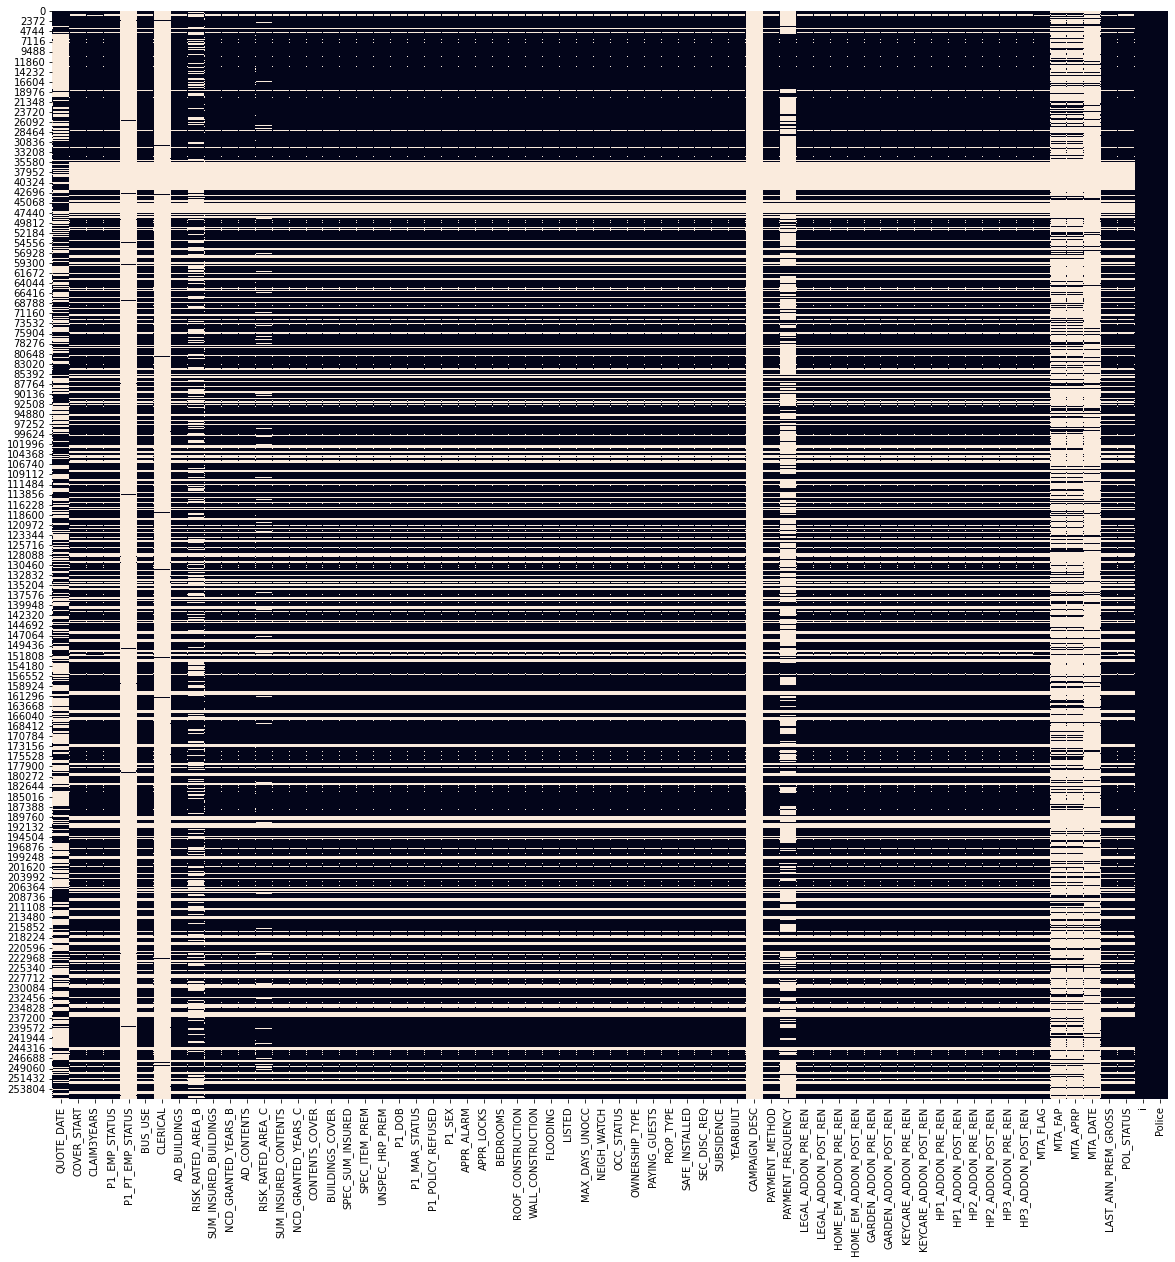

In [8]:
#Check missing values in dataset
plt.figure(figsize = (20, 20))
sns.heatmap(df.isnull(), cbar=False)

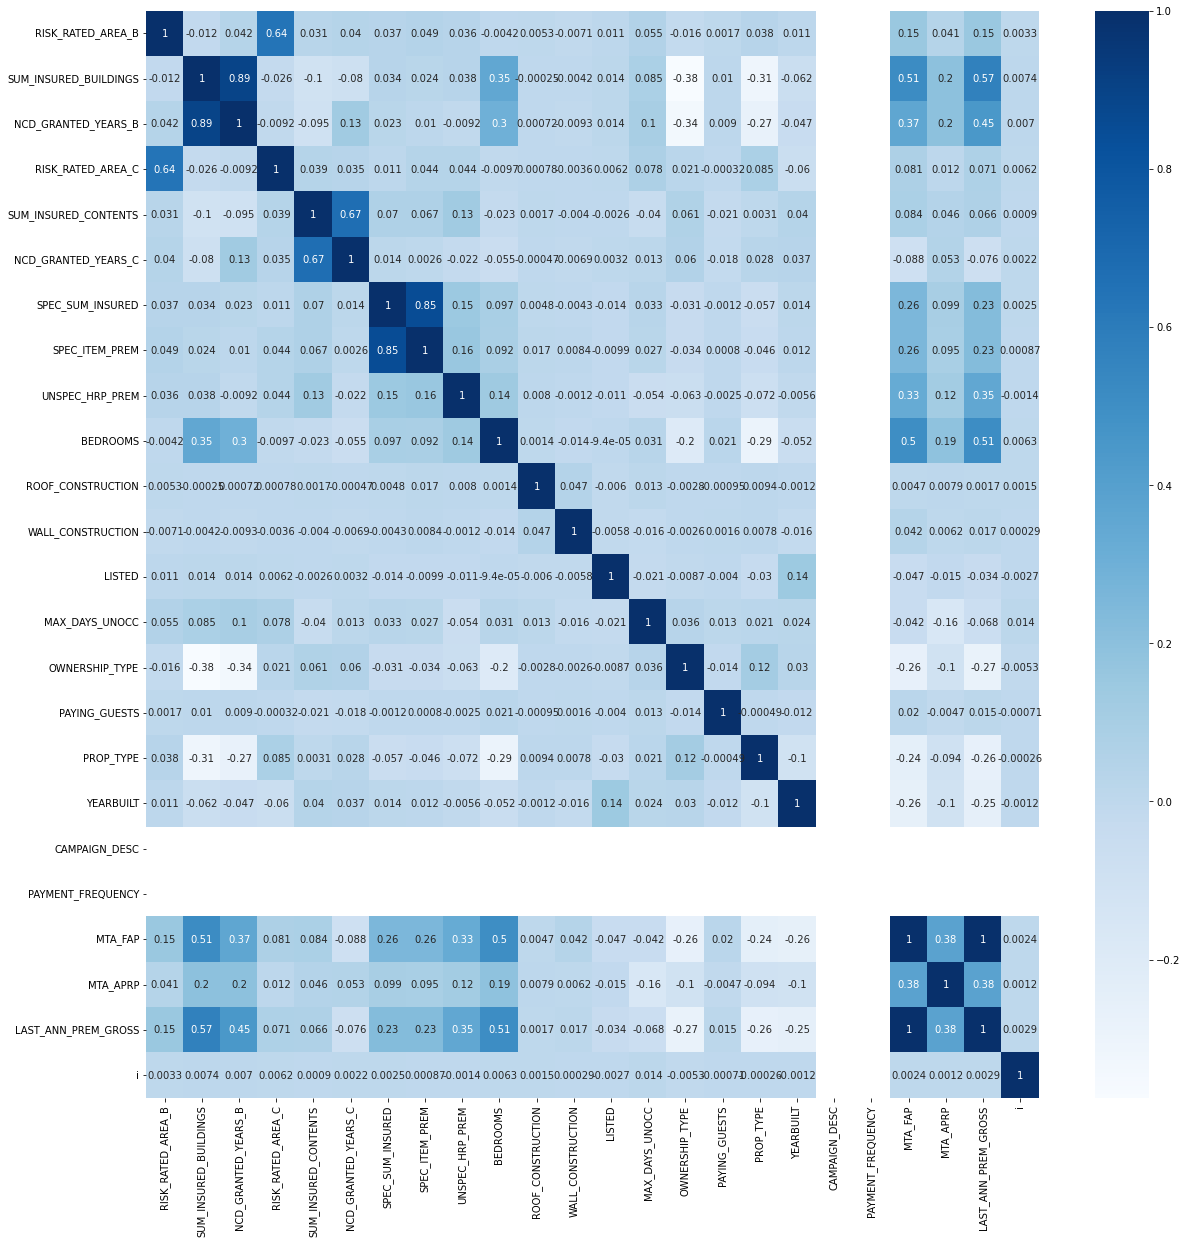

In [9]:
#Check Correlation
corr = df.corr()
plt.figure(figsize = (20,20))
sns.heatmap(corr, cmap="Blues", annot=True)

In [10]:
#Dataset Preprocessing

#Remove empty values in teaget variable
df = df[df["POL_STATUS"].notnull()]

#Clean the target variable
df = df[df["POL_STATUS"] != "Unknown"]
df["X_IS_CHURNED"] = np.where(df["POL_STATUS"] == "Live", 0, 1)

#Construct Age, Cover length, and Property Age features
df["age"] = (datetime.strptime("2013-01-01", "%Y-%m-%d") - pd.to_datetime(df["P1_DOB"])).dt.days // 365
df["property_age"] = 2013 - df["YEARBUILT"]
df["cover_length"] = 2013 - pd.to_datetime(df["COVER_START"]).dt.year

#Fill missing values in numerical features
df["RISK_RATED_AREA_C"] = df["RISK_RATED_AREA_C"].fillna(0)
df["MTA_FAP"] = df["MTA_FAP"].fillna(0)
df["MTA_APRP"] = df["MTA_APRP"].fillna(0)

df.shape

(189005, 70)

In [11]:
#Correlated features removed
categorical_cols=['CLAIM3YEARS','BUS_USE', 'CONTENTS_COVER', 'BUILDINGS_COVER',
'P1_MAR_STATUS', 'P1_SEX', 'APPR_ALARM', 'APPR_LOCKS','FLOODING', 'LISTED', 'NEIGH_WATCH', 'OCC_STATUS',
'OWNERSHIP_TYPE', 'PROP_TYPE', 'SAFE_INSTALLED','SUBSIDENCE','PAYMENT_METHOD',
'LEGAL_ADDON_PRE_REN','LEGAL_ADDON_POST_REN', 'HOME_EM_ADDON_PRE_REN',
'HOME_EM_ADDON_POST_REN', 'GARDEN_ADDON_PRE_REN',
'GARDEN_ADDON_POST_REN', 'KEYCARE_ADDON_PRE_REN',
'KEYCARE_ADDON_POST_REN', 'HP1_ADDON_PRE_REN', 'HP1_ADDON_POST_REN',
'HP2_ADDON_PRE_REN', 'HP2_ADDON_POST_REN', 'HP3_ADDON_PRE_REN',
'HP3_ADDON_POST_REN', 'RISK_RATED_AREA_C']


numerical_cols = ['NCD_GRANTED_YEARS_B', 'NCD_GRANTED_YEARS_C','LAST_ANN_PREM_GROSS', 'age', 'property_age', 'cover_length', 'MTA_FAP', 'MTA_APRP']

In [12]:
FEATS =['CLAIM3YEARS','BUS_USE', 'CONTENTS_COVER', 'BUILDINGS_COVER',
'P1_MAR_STATUS', 'P1_SEX', 'APPR_ALARM', 'APPR_LOCKS','FLOODING', 'LISTED', 'NEIGH_WATCH', 'OCC_STATUS',
'OWNERSHIP_TYPE', 'PROP_TYPE', 'SAFE_INSTALLED','SUBSIDENCE','PAYMENT_METHOD',
'LEGAL_ADDON_PRE_REN','LEGAL_ADDON_POST_REN', 'HOME_EM_ADDON_PRE_REN',
'HOME_EM_ADDON_POST_REN', 'GARDEN_ADDON_PRE_REN', 'GARDEN_ADDON_POST_REN', 'KEYCARE_ADDON_PRE_REN',
'KEYCARE_ADDON_POST_REN', 'HP1_ADDON_PRE_REN', 'HP1_ADDON_POST_REN',
'HP2_ADDON_PRE_REN', 'HP2_ADDON_POST_REN', 'HP3_ADDON_PRE_REN',
'HP3_ADDON_POST_REN', 'NCD_GRANTED_YEARS_B', 'NCD_GRANTED_YEARS_C','LAST_ANN_PREM_GROSS',
'age', 'property_age', 'cover_length', 'RISK_RATED_AREA_C', 'MTA_FAP', 'MTA_APRP']

TARGET=["X_IS_CHURNED"]

In [13]:
#Describe Numerical Columns
df[numerical_cols].describe()

,NCD_GRANTED_YEARS_B,NCD_GRANTED_YEARS_C,LAST_ANN_PREM_GROSS,age,property_age,cover_length,MTA_FAP,MTA_APRP
count,189005.000000,189005.000000,189005.000000,189005.000000,189005.000000,189005.000000,189005.000000,189005.000000
mean,4.477167,5.497336,186.725297,72.693860,68.006005,6.014058,58.832172,26.537574
std,2.677508,1.777474,99.495998,10.918894,28.903573,3.899083,108.468189,77.830105
min,0.000000,0.000000,-1152.680000,21.000000,13.000000,1.000000,-1152.680000,-423.080000
25%,3.000000,6.000000,123.380000,65.000000,53.000000,3.000000,0.000000,0.000000
50%,6.000000,6.000000,177.340000,73.000000,67.000000,5.000000,0.000000,0.000000
75%,6.000000,6.000000,234.960000,81.000000,93.000000,8.000000,97.110000,0.000000
max,9.000000,9.000000,4631.860000,123.000000,264.000000,21.000000,4631.860000,1449.240000


In [14]:
#Split the dataset
X_train, X_test, y_train, y_test = train_test_split(df[FEATS], df[TARGET], test_size = .3, random_state = 42)

In [15]:
# Standardise the dataset
for_clust = df

for col in numerical_cols:
    scaler = StandardScaler()
    X_train[col] = scaler.fit_transform(X_train[[col]])
    X_test[col] = scaler.transform(X_test[[col]])

In [16]:
#index of categorical features
cat_index=[df[FEATS].columns.get_loc(c) for c in categorical_cols if c in df[FEATS]]

#Catgeorical to string
X_train[categorical_cols] = X_train[categorical_cols].astype(str)
X_test[categorical_cols] = X_test[categorical_cols].astype(str)

In [17]:
#Build Model
model = CatBoostClassifier(one_hot_max_size=100)

In [18]:
# train the model
model.fit(X_train, y_train, cat_features=cat_index)
fitted_model_params = model.get_all_params()
print('got params')

Learning rate set to 0.082955
0:	learn: 0.6685930	total: 71.6ms	remaining: 1m 11s
1:	learn: 0.6480878	total: 81.2ms	remaining: 40.5s
2:	learn: 0.6339186	total: 90.6ms	remaining: 30.1s
3:	learn: 0.6193714	total: 99.1ms	remaining: 24.7s
4:	learn: 0.6073701	total: 108ms	remaining: 21.4s
5:	learn: 0.5977643	total: 116ms	remaining: 19.2s
6:	learn: 0.5905514	total: 123ms	remaining: 17.5s
7:	learn: 0.5841251	total: 132ms	remaining: 16.4s
8:	learn: 0.5776472	total: 140ms	remaining: 15.4s
9:	learn: 0.5727139	total: 149ms	remaining: 14.8s
10:	learn: 0.5691780	total: 157ms	remaining: 14.1s
11:	learn: 0.5650979	total: 166ms	remaining: 13.6s
12:	learn: 0.5618268	total: 175ms	remaining: 13.3s
13:	learn: 0.5594465	total: 184ms	remaining: 12.9s
14:	learn: 0.5565515	total: 194ms	remaining: 12.7s
15:	learn: 0.5543491	total: 207ms	remaining: 12.7s
16:	learn: 0.5523287	total: 216ms	remaining: 12.5s
17:	learn: 0.5508178	total: 225ms	remaining: 12.3s
18:	learn: 0.5492744	total: 236ms	remaining: 12.2s
19:	le

167:	learn: 0.5161866	total: 1.58s	remaining: 7.82s
168:	learn: 0.5160810	total: 1.59s	remaining: 7.81s
169:	learn: 0.5159925	total: 1.6s	remaining: 7.79s
170:	learn: 0.5158643	total: 1.6s	remaining: 7.78s
171:	learn: 0.5157620	total: 1.61s	remaining: 7.77s
172:	learn: 0.5157023	total: 1.62s	remaining: 7.76s
173:	learn: 0.5156302	total: 1.63s	remaining: 7.74s
174:	learn: 0.5155843	total: 1.64s	remaining: 7.73s
175:	learn: 0.5154973	total: 1.65s	remaining: 7.71s
176:	learn: 0.5154401	total: 1.66s	remaining: 7.7s
177:	learn: 0.5153156	total: 1.66s	remaining: 7.68s
178:	learn: 0.5152621	total: 1.67s	remaining: 7.67s
179:	learn: 0.5151835	total: 1.68s	remaining: 7.65s
180:	learn: 0.5151041	total: 1.69s	remaining: 7.63s
181:	learn: 0.5150584	total: 1.69s	remaining: 7.62s
182:	learn: 0.5149879	total: 1.7s	remaining: 7.6s
183:	learn: 0.5148673	total: 1.71s	remaining: 7.59s
184:	learn: 0.5147681	total: 1.72s	remaining: 7.57s
185:	learn: 0.5146700	total: 1.73s	remaining: 7.56s
186:	learn: 0.514

327:	learn: 0.5067697	total: 3.17s	remaining: 6.5s
328:	learn: 0.5066297	total: 3.18s	remaining: 6.49s
329:	learn: 0.5065452	total: 3.2s	remaining: 6.49s
330:	learn: 0.5064987	total: 3.21s	remaining: 6.49s
331:	learn: 0.5064527	total: 3.23s	remaining: 6.49s
332:	learn: 0.5063998	total: 3.24s	remaining: 6.48s
333:	learn: 0.5063593	total: 3.25s	remaining: 6.47s
334:	learn: 0.5063209	total: 3.26s	remaining: 6.47s
335:	learn: 0.5062776	total: 3.27s	remaining: 6.46s
336:	learn: 0.5062430	total: 3.28s	remaining: 6.45s
337:	learn: 0.5062035	total: 3.29s	remaining: 6.45s
338:	learn: 0.5061499	total: 3.31s	remaining: 6.45s
339:	learn: 0.5061196	total: 3.32s	remaining: 6.44s
340:	learn: 0.5060637	total: 3.33s	remaining: 6.44s
341:	learn: 0.5060416	total: 3.35s	remaining: 6.44s
342:	learn: 0.5060315	total: 3.35s	remaining: 6.43s
343:	learn: 0.5059672	total: 3.37s	remaining: 6.42s
344:	learn: 0.5059649	total: 3.38s	remaining: 6.41s
345:	learn: 0.5059113	total: 3.39s	remaining: 6.41s
346:	learn: 0.

499:	learn: 0.4994014	total: 4.99s	remaining: 4.99s
500:	learn: 0.4993666	total: 5s	remaining: 4.98s
501:	learn: 0.4993410	total: 5.01s	remaining: 4.97s
502:	learn: 0.4993282	total: 5.02s	remaining: 4.96s
503:	learn: 0.4993251	total: 5.03s	remaining: 4.95s
504:	learn: 0.4992777	total: 5.04s	remaining: 4.94s
505:	learn: 0.4992425	total: 5.05s	remaining: 4.93s
506:	learn: 0.4991981	total: 5.07s	remaining: 4.92s
507:	learn: 0.4991599	total: 5.08s	remaining: 4.92s
508:	learn: 0.4991072	total: 5.09s	remaining: 4.91s
509:	learn: 0.4990685	total: 5.11s	remaining: 4.91s
510:	learn: 0.4990372	total: 5.12s	remaining: 4.9s
511:	learn: 0.4989799	total: 5.13s	remaining: 4.89s
512:	learn: 0.4989479	total: 5.14s	remaining: 4.88s
513:	learn: 0.4989065	total: 5.16s	remaining: 4.88s
514:	learn: 0.4989054	total: 5.17s	remaining: 4.87s
515:	learn: 0.4988588	total: 5.18s	remaining: 4.86s
516:	learn: 0.4988305	total: 5.19s	remaining: 4.85s
517:	learn: 0.4988038	total: 5.21s	remaining: 4.84s
518:	learn: 0.49

676:	learn: 0.4931388	total: 6.6s	remaining: 3.15s
677:	learn: 0.4931100	total: 6.61s	remaining: 3.14s
678:	learn: 0.4930702	total: 6.62s	remaining: 3.13s
679:	learn: 0.4930397	total: 6.63s	remaining: 3.12s
680:	learn: 0.4929972	total: 6.64s	remaining: 3.11s
681:	learn: 0.4929753	total: 6.65s	remaining: 3.1s
682:	learn: 0.4929380	total: 6.65s	remaining: 3.09s
683:	learn: 0.4929058	total: 6.66s	remaining: 3.08s
684:	learn: 0.4928619	total: 6.67s	remaining: 3.07s
685:	learn: 0.4928388	total: 6.68s	remaining: 3.06s
686:	learn: 0.4928034	total: 6.69s	remaining: 3.05s
687:	learn: 0.4927738	total: 6.7s	remaining: 3.04s
688:	learn: 0.4927683	total: 6.71s	remaining: 3.03s
689:	learn: 0.4927407	total: 6.71s	remaining: 3.02s
690:	learn: 0.4926558	total: 6.72s	remaining: 3.01s
691:	learn: 0.4926220	total: 6.73s	remaining: 3s
692:	learn: 0.4925709	total: 6.74s	remaining: 2.99s
693:	learn: 0.4925251	total: 6.75s	remaining: 2.98s
694:	learn: 0.4925099	total: 6.76s	remaining: 2.97s
695:	learn: 0.4924

843:	learn: 0.4877249	total: 8.43s	remaining: 1.56s
844:	learn: 0.4876891	total: 8.44s	remaining: 1.55s
845:	learn: 0.4876690	total: 8.45s	remaining: 1.54s
846:	learn: 0.4876249	total: 8.46s	remaining: 1.53s
847:	learn: 0.4875973	total: 8.47s	remaining: 1.52s
848:	learn: 0.4875621	total: 8.48s	remaining: 1.51s
849:	learn: 0.4875367	total: 8.49s	remaining: 1.5s
850:	learn: 0.4875102	total: 8.51s	remaining: 1.49s
851:	learn: 0.4874834	total: 8.52s	remaining: 1.48s
852:	learn: 0.4874826	total: 8.53s	remaining: 1.47s
853:	learn: 0.4874467	total: 8.54s	remaining: 1.46s
854:	learn: 0.4874241	total: 8.55s	remaining: 1.45s
855:	learn: 0.4873958	total: 8.56s	remaining: 1.44s
856:	learn: 0.4873660	total: 8.57s	remaining: 1.43s
857:	learn: 0.4873391	total: 8.59s	remaining: 1.42s
858:	learn: 0.4873108	total: 8.6s	remaining: 1.41s
859:	learn: 0.4872778	total: 8.61s	remaining: 1.4s
860:	learn: 0.4872409	total: 8.62s	remaining: 1.39s
861:	learn: 0.4872010	total: 8.63s	remaining: 1.38s
862:	learn: 0.4

In [19]:
#Classification Report
y_preds = model.predict(X_test)
test_recall = recall_score(y_test, y_preds, average='binary')
test_precision = precision_score(y_test, y_preds)
test_class = classification_report(y_test, y_preds)
cnf_matrix = confusion_matrix(y_test, y_preds)
print('{}: Recall w/all features on test data {}:'.format('catboost', test_recall.round(4)))
print(test_class)
print(cnf_matrix)
print('-------------------------------------------------------')

catboost: Recall w/all features on test data 0.3326:
              precision    recall  f1-score   support

           0       0.76      0.93      0.84     39589
           1       0.68      0.33      0.45     17113

    accuracy                           0.75     56702
   macro avg       0.72      0.63      0.64     56702
weighted avg       0.74      0.75      0.72     56702

[[36904  2685]
 [11422  5691]]
-------------------------------------------------------


In [20]:
#Cross Validation
from sklearn.utils import shuffle

cross_data=df[FEATS]
cross_data['TARGET']=df[TARGET]

for col in numerical_cols:
    scaler = StandardScaler()
    cross_data[col] = scaler.fit_transform(cross_data[[col]])
    cross_data[col] = scaler.transform(cross_data[[col]])

#index of categorical features
cat_index=[cross_data[FEATS].columns.get_loc(c) for c in categorical_cols if c in cross_data[FEATS]]

#Catgeorical to string
cross_data[categorical_cols] = cross_data[categorical_cols].astype(str)
cross_data[categorical_cols] = cross_data[categorical_cols].astype(str)


#Create Model
model_c = CatBoostClassifier(one_hot_max_size=100, logging_level='Silent')

for i in range(5):
    cross_data = shuffle(cross_data)
    Xtrain, Xtest, ytrain, ytest = train_test_split(cross_data[FEATS], cross_data['TARGET'], test_size = .3)
  
    # train the model
    model_c.fit(Xtrain, ytrain, cat_features=cat_index)
    fitted_model_params = model_c.get_all_params()
    print('got params')

    # model results
    y_preds = model_c.predict(Xtest)
    test_recall = recall_score(ytest, y_preds, average='binary')
    test_precision = precision_score(ytest, y_preds)
    test_class = classification_report(ytest, y_preds)
    cnf_matrix = confusion_matrix(ytest, y_preds)
    print('Round {}'.format(i))
    print('{}: Recall w/all features on test data {}:'.format('catboost', test_recall.round(4)))
    print(test_class)
    print(cnf_matrix)
    print('-------------------------------------------------------')


got params
Round 0
catboost: Recall w/all features on test data 0.3294:
              precision    recall  f1-score   support

           0       0.76      0.93      0.84     39640
           1       0.67      0.33      0.44     17062

    accuracy                           0.75     56702
   macro avg       0.72      0.63      0.64     56702
weighted avg       0.74      0.75      0.72     56702

[[36914  2726]
 [11442  5620]]
-------------------------------------------------------
got params
Round 1
catboost: Recall w/all features on test data 0.3401:
              precision    recall  f1-score   support

           0       0.77      0.93      0.84     39604
           1       0.67      0.34      0.45     17098

    accuracy                           0.75     56702
   macro avg       0.72      0.63      0.64     56702
weighted avg       0.74      0.75      0.72     56702

[[36740  2864]
 [11283  5815]]
-------------------------------------------------------
got params
Round 2
catboost:

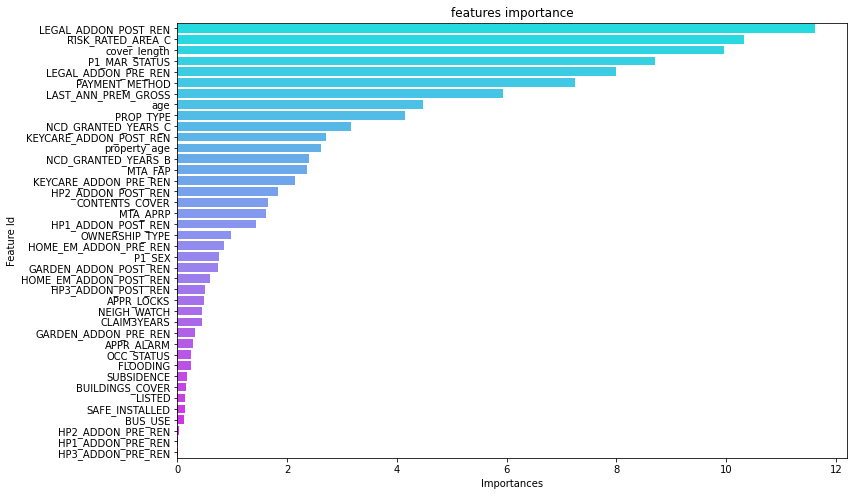

In [21]:
#Feature Importance Plot
df_feature_importance = pd.DataFrame(model.get_feature_importance(prettified=True))
#plotting feature importance
plt.figure(figsize=(12, 8));
feature_plot= sns.barplot(x="Importances", y="Feature Id", data=df_feature_importance,palette="cool");
plt.title('features importance');

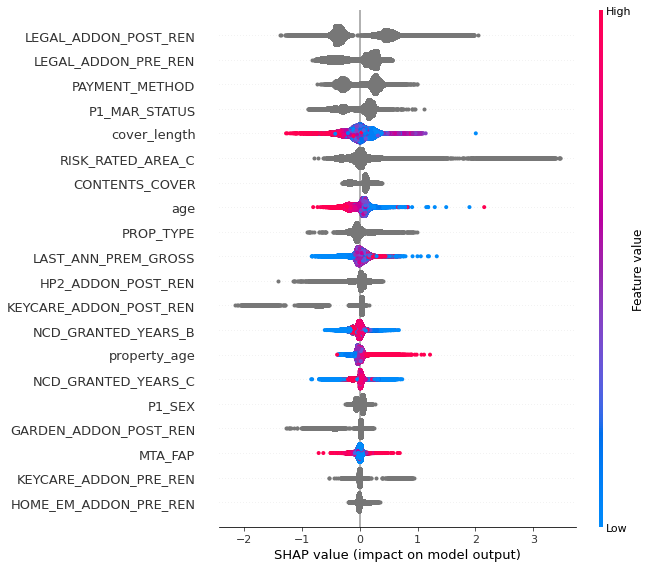

In [22]:
#Shap Values, shap plot
model_shap_values = shap.TreeExplainer(model).shap_values(X_train)
feature_values = np.abs(model_shap_values).mean(0)
feature_names = model.feature_names_

fi_scaler = MinMaxScaler()

feature_values_scaled = fi_scaler.fit_transform(feature_values.reshape(-1, 1)).reshape(-1)
feature_values_weighted = feature_values_scaled / sum(feature_values_scaled)
feature_importance_zipped = zip(feature_names, feature_values_weighted)
feature_importance = dict(sorted(feature_importance_zipped, key=lambda item: item[1], reverse=True))


shap.summary_plot(model_shap_values, X_train)

In [23]:
#SHAP Feature importance
feature_importance_zipped = zip(feature_names, feature_values_scaled)
feature_importance = sorted(feature_importance_zipped, key=lambda item: item[1], reverse=True)
feature_importance

[('LEGAL_ADDON_POST_REN', 1.0),
 ('LEGAL_ADDON_PRE_REN', 0.640608105408082),
 ('PAYMENT_METHOD', 0.5959023524990322),
 ('P1_MAR_STATUS', 0.4480985934940963),
 ('cover_length', 0.35190773066028247),
 ('RISK_RATED_AREA_C', 0.33455074152009545),
 ('CONTENTS_COVER', 0.25955629339139397),
 ('age', 0.25717039267861047),
 ('PROP_TYPE', 0.20587752837487),
 ('LAST_ANN_PREM_GROSS', 0.1998446000820816),
 ('HP2_ADDON_POST_REN', 0.18043819629879032),
 ('KEYCARE_ADDON_POST_REN', 0.16473596408225274),
 ('NCD_GRANTED_YEARS_B', 0.16012768954013365),
 ('property_age', 0.13355886395071348),
 ('NCD_GRANTED_YEARS_C', 0.1278913000456877),
 ('P1_SEX', 0.1172180510244259),
 ('GARDEN_ADDON_POST_REN', 0.10542614612482126),
 ('MTA_FAP', 0.08374701291861644),
 ('KEYCARE_ADDON_PRE_REN', 0.081370141401392),
 ('HOME_EM_ADDON_PRE_REN', 0.07864113873028775),
 ('HP1_ADDON_POST_REN', 0.07342983939871728),
 ('APPR_LOCKS', 0.06531019361190929),
 ('GARDEN_ADDON_PRE_REN', 0.045848433914871096),
 ('MTA_APRP', 0.0451920086659

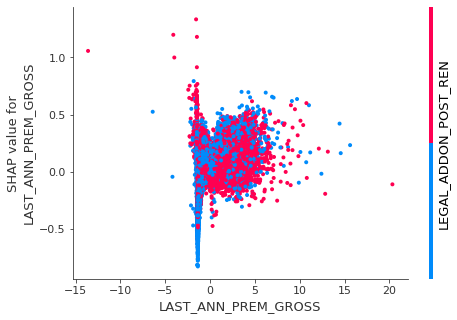

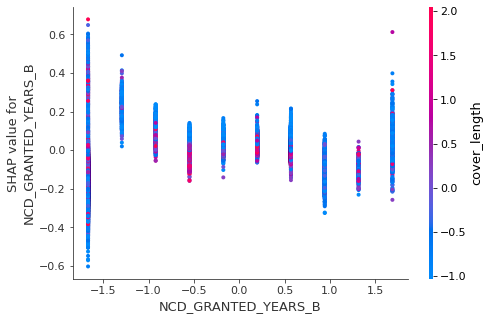

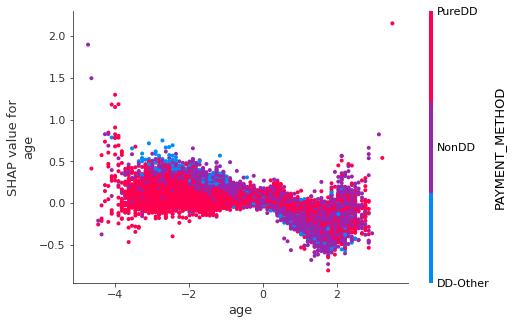

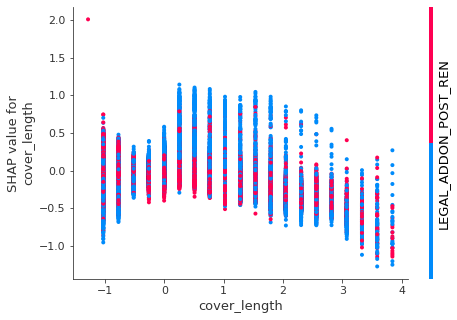

In [24]:
nm = ['LAST_ANN_PREM_GROSS', 'NCD_GRANTED_YEARS_B', 'age', 'cover_length']

for feat in nm:
    shap.dependence_plot(feat, model_shap_values, X_train)

Text(0.5, 0.98, 'Performance After')

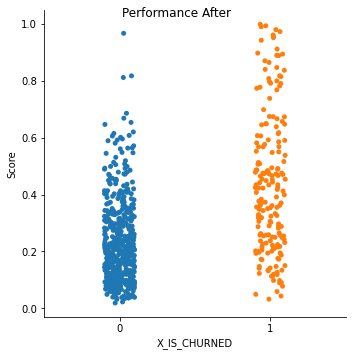

In [25]:
#Check sample prediction
y_proba = model.predict_proba(X_test)
predicted_score = [i[1] for i in y_proba]
dt = pd.DataFrame(y_test)
dt['Score'] = predicted_score
rp3 = sns.catplot(x='X_IS_CHURNED', y='Score', jitter=True, data=dt[:700])
rp3.fig.suptitle('Performance After')

No Effect: ROC AUC=0.500
Churn Model: ROC AUC=0.751


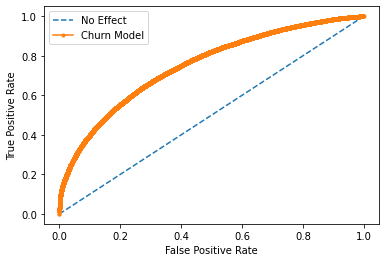

In [26]:
#ROC-AUC curve
testX=X_test
testy=y_test['X_IS_CHURNED']

lr_probs = model.predict_proba(testX)
lr_probs = lr_probs[:, 1]
ns_probs = [0 for _ in range(len(testy))]

ns_auc = roc_auc_score(testy, ns_probs)
lr_auc = roc_auc_score(testy, lr_probs)

print('No Effect: ROC AUC=%.3f' % (ns_auc))
print('Churn Model: ROC AUC=%.3f' % (lr_auc))

ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)

plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Effect')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Churn Model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

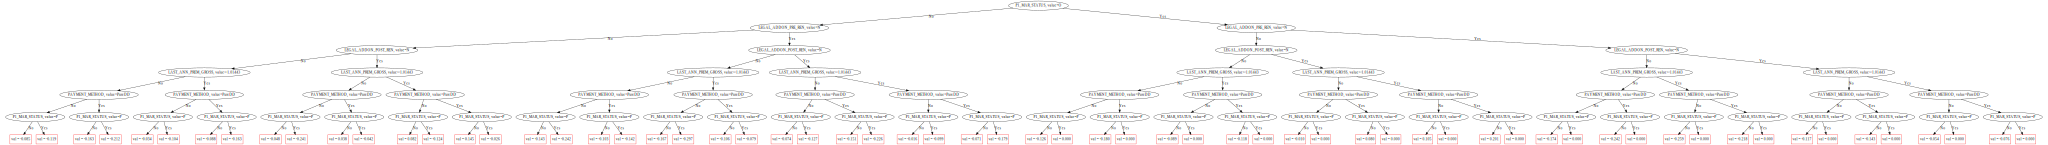

In [27]:
#Catboost Decision Tree
pool=Pool(X_train, y_train, cat_features=cat_index, feature_names=list(X_train.columns))
model.plot_tree(tree_idx=0,pool=pool)

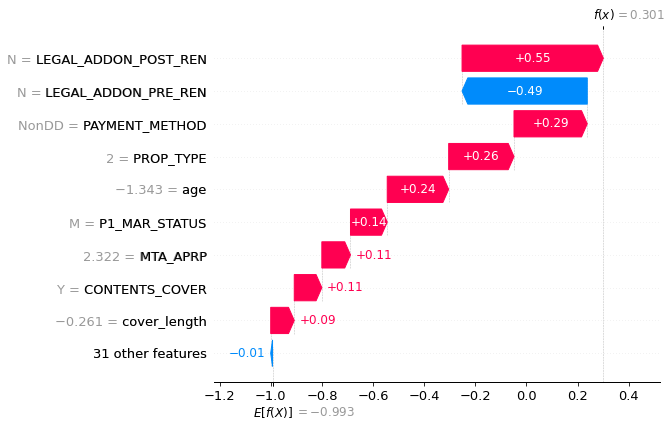

In [28]:
#SHAP cumulative plot
CatBoost=model
cat_explainer = shap.TreeExplainer(CatBoost)
cat_shap_values = cat_explainer.shap_values(X_train)


shap.force_plot(cat_explainer.expected_value, cat_shap_values[0,:], X_train.iloc[0,:]) #plot_cmap=['#32CD32', '#B22222'])
shap.plots._waterfall.waterfall_legacy(cat_explainer.expected_value, cat_shap_values[0], features = X_train.iloc[0,:], )

In [29]:
#Example Shap decision plot
explainer = shap.TreeExplainer(model, feature_perturbation="tree_path_dependent")
expected_value = explainer.expected_value
if isinstance(expected_value, list):
    expected_value = expected_value[1]
print(f"Explainer expected value: {expected_value}")
X_display=X_test
select = range(40)
features = X_test.iloc[select]
features_display = X_display.loc[features.index]

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    shap_values = explainer.shap_values(features)[1]

Explainer expected value: [-0.99304265]


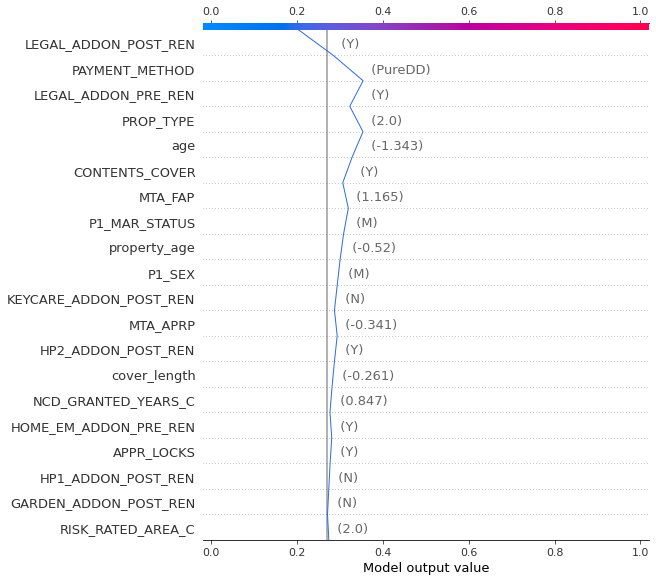

In [30]:
#Example Shap decision
shap.decision_plot(expected_value, shap_values, features_display, link='logit')


In [31]:
data_clust=df[df['X_IS_CHURNED']==1]
data_clust=data_clust[FEATS]

In [32]:
#Factor Analysis of Mixed Data 
famd = prince.FAMD(n_components=83, n_iter=3,
                   copy=True, check_input=True,
                   engine='auto',random_state=42)

famd = famd.fit(data_clust)

Text(0, 0.5, 'Cumulative Explained Variance')

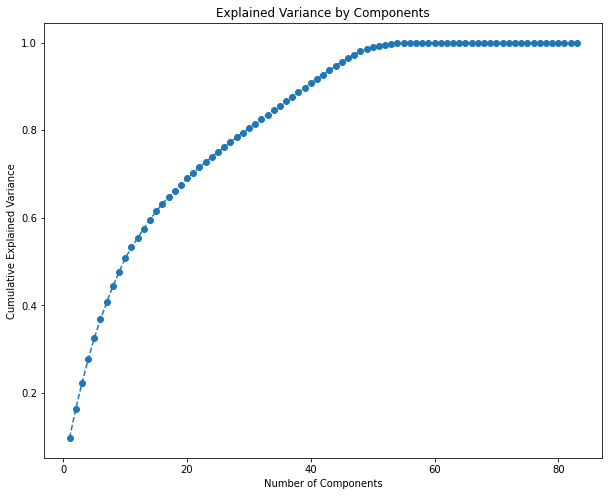

In [33]:
#Explained Variance by FAMD VS num of components
plt.figure(figsize=(10, 8))
plt.plot(range(1,84), famd.explained_inertia_.cumsum(), marker='o', linestyle='--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

In [34]:
#Factor Analysis of Mixed Data with 30 components
famd = prince.FAMD(n_components=30, n_iter=3,
                   copy=True, check_input=True,
                   engine='auto',random_state=42)


In [35]:
famd.fit(data_clust)

FAMD(n_components=30, random_state=42)

In [36]:
#Explained Variance by FAMD
sum(famd.explained_inertia_)

0.802616513098569

In [37]:
scores_famd = famd.transform(data_clust)

In [38]:
#Elbow method
wcss=[]
for i in range(1, 21):
    kmeans_famd = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans_famd.fit(scores_famd)
    wcss.append(kmeans_famd.inertia_)

Text(0, 0.5, 'WCSS')

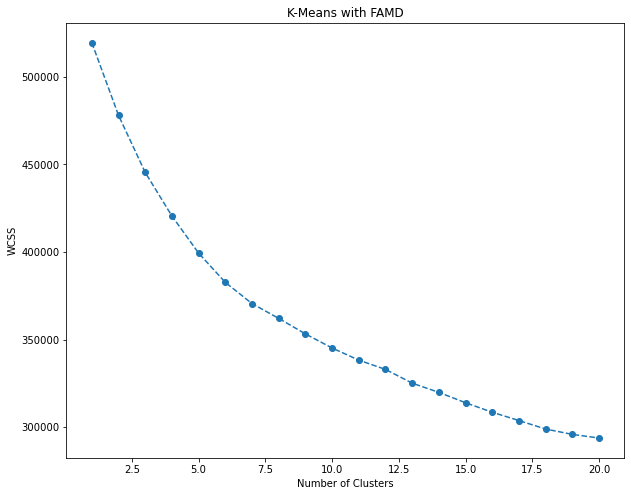

In [39]:
#Elbow curve
plt.figure(figsize=(10, 8))
plt.plot(range(1,21), wcss, marker='o', linestyle='--')
plt.title('K-Means with FAMD')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

In [40]:
#KMeans with FAMD
kmeans_famd=KMeans(n_clusters=5, init='k-means++', random_state=42)
kmeans_famd.fit(scores_famd)

df_segm_famd_kmeans = pd.concat([data_clust.reset_index(drop=True), pd.DataFrame(scores_famd)], axis=1)
df_segm_famd_kmeans=data_clust

for i in range(0, 30):
    df_segm_famd_kmeans[str(i)]=scores_famd[i]
    
df_segm_famd_kmeans['i']=scores_famd[0]
df_segm_famd_kmeans['Segment'] = kmeans_famd.labels_

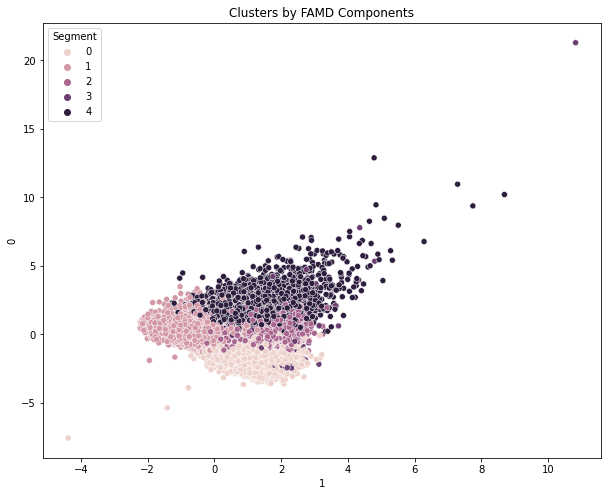

In [41]:
#Clusters Plot
x_axis=df_segm_famd_kmeans['1']
y_axis=df_segm_famd_kmeans['0']
plt.figure(figsize=(10, 8))
sns.scatterplot(x_axis, y_axis, hue=df_segm_famd_kmeans['Segment'])
plt.title('Clusters by FAMD Components')
plt.show()

In [42]:
#Cluster Description 
finaa=df_segm_famd_kmeans

# Cluster interpretation
finaa.rename(columns = {'i':'Total'}, inplace = True)
finaa.groupby('Segment').agg(
    {
        'Total':'count',
        'APPR_LOCKS': lambda x: x.value_counts().index[0],
        'LISTED': lambda x: x.value_counts().index[0],
        'RISK_RATED_AREA_C': lambda x: x.value_counts().index[0],
        'CONTENTS_COVER': lambda x: x.value_counts().index[0],
        'P1_SEX': lambda x: x.value_counts().index[0],
        'PROP_TYPE': lambda x: x.value_counts().index[0],
        'PAYMENT_METHOD': lambda x: x.value_counts().index[0],
        'LEGAL_ADDON_PRE_REN': lambda x: x.value_counts().index[0],
        'LEGAL_ADDON_POST_REN': lambda x: x.value_counts().index[0],
        'NCD_GRANTED_YEARS_B': 'mean',
        'NCD_GRANTED_YEARS_C': 'mean',
        'age': 'mean',
        'LAST_ANN_PREM_GROSS': 'mean',
        'age': 'mean',
        'property_age': 'mean',
        'cover_length': 'mean',
        'MTA_FAP': 'mean',
        'MTA_APRP': 'mean'
    }
).reset_index()

,Segment,Total,APPR_LOCKS,LISTED,RISK_RATED_AREA_C,CONTENTS_COVER,P1_SEX,PROP_TYPE,PAYMENT_METHOD,LEGAL_ADDON_PRE_REN,LEGAL_ADDON_POST_REN,NCD_GRANTED_YEARS_B,NCD_GRANTED_YEARS_C,age,LAST_ANN_PREM_GROSS,property_age,cover_length,MTA_FAP,MTA_APRP
0,0,8078,Y,3.0,5.0,N,F,10.0,NonDD,N,N,0.018198,5.854543,72.023521,81.982665,63.660807,5.963233,21.829292,9.571252
1,1,35486,Y,3.0,0.0,Y,M,10.0,NonDD,Y,Y,5.990701,6.101251,71.990982,203.104381,68.399679,4.590007,33.159892,1.465791
2,2,6302,Y,3.0,0.0,Y,M,10.0,NonDD,Y,N,4.202158,1.084259,70.170263,220.147534,71.164234,5.517137,59.718670,8.712863
3,3,307,N,2.0,0.0,Y,M,19.0,NonDD,Y,N,4.293160,5.228013,70.687296,269.284430,143.407166,3.889251,94.450423,32.263485
4,4,6672,Y,3.0,0.0,Y,M,10.0,NonDD,Y,Y,5.781775,5.839778,70.378597,278.984813,72.742656,6.355516,277.720252,195.639826
